In [2]:
using OTSIN
using Plots
using StatsPlots
using LinearAlgebra

┌ Info: Recompiling stale cache file /Users/michielstock/.julia/compiled/v1.0/OTSIN/GYaVa.ji for OTSIN [7b885788-be81-11e9-3333-a562fe72c8d6]
└ @ Base loading.jl:1190
┌ Warning: Package OTSIN does not have StatsBase in its dependencies:
│ - If you have OTSIN checked out for development and have
│   added StatsBase as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with OTSIN
└ Loading StatsBase into OTSIN from project dependency, future warnings for OTSIN are suppressed.
┌ Info: Recompiling stale cache file /Users/michielstock/.julia/compiled/v1.0/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1190
┌ Info: Recompiling stale cache file /Users/michielstock/.julia/compiled/v1.0/StatsPlots/SiylL.ji for StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1190


In [3]:
# ML_PL_007 web of life
Y = [
469 110 35 36 11 12 8 8 14 8 3 2 7 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0;
36 31 0 0 20 3 0 5 0 5 9 10 2 5 2 0 0 4 2 1 0 3 1 2 2 0 0 0 0 0 0 0 0 1 1 1;
8 0 3 0 0 8 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;
2 1 1 0 0 0 0 0 0 0 0 1 0 2 0 0 4 0 1 0 0 0 2 0 0 1 0 1 0 1 0 0 0 0 0 0;
2 6 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;
2 0 0 0 0 0 4 0 0 0 1 0 2 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;
0 0 0 0 0 0 6 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;
4 0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0;
1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0;
3 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;
0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;
0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;
0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0;
0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0;
1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

16×36 Array{Int64,2}:
 469  110  35  36  11  12  8  8  14  8  …  0  0  1  0  0  0  0  0  0  0  0  0
  36   31   0   0  20   3  0  5   0  5     2  0  0  0  0  0  0  0  0  1  1  1
   8    0   3   0   0   8  0  4   0  0     0  0  0  0  0  0  0  0  0  0  0  0
   2    1   1   0   0   0  0  0   0  0     0  1  0  1  0  1  0  0  0  0  0  0
   2    6   0   1   1   0  0  0   0  0     0  0  0  0  0  0  0  0  0  0  0  0
   2    0   0   0   0   0  4  0   0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
   0    0   0   0   0   0  6  0   0  0     0  0  0  0  0  0  0  0  0  0  0  0
   4    0   0   0   0   0  2  0   0  0     0  0  0  0  0  0  1  0  0  0  0  0
   1    0   0   0   0   0  0  0   0  1     0  0  0  0  1  0  0  0  0  0  0  0
   3    0   2   0   0   0  0  0   0  0     0  0  0  0  0  0  0  0  0  0  0  0
   0    0   4   0   0   0  0  0   0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
   0    0   1   0   0   0  1  0   0  0     0  0  0  0  0  0  0  0  0  0  0  0
   0    0   0   0   0   0  0  0   0  0    

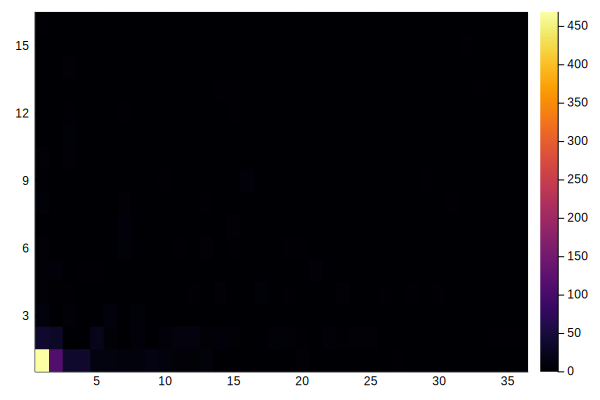

In [4]:
heatmap(Y)

In [5]:
P = OTSIN.normalize(Y)
a, b = marginals(P)
n, m = size(Y)

(16, 36)

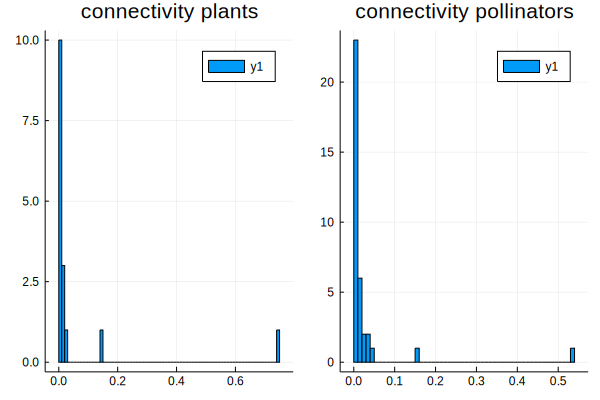

In [6]:
plot(histogram(a, title="connectivity plants"), histogram(b, title="connectivity pollinators"))

In [18]:
γ = 1e-1
offset = 0.1

M_free = fitM(P, fix_a=false, fix_b=false, γ=γ, reg=Entropic(offset))
M_a = fitM(P, fix_a=true, fix_b=false, γ=γ, reg=Entropic(offset))
M_b = fitM(P, fix_a=false, fix_b=true, γ=γ, reg=Entropic(offset))
M_ab = fitM(P, fix_a=true, fix_b=true, γ=γ, reg=Entropic(offset))

16×36 Array{Float64,2}:
 0.672794  0.38044   0.361989  0.396457  …  0.355033  0.355033  0.355033
 0.255535  0.378064  0.327754  0.334815     0.360884  0.360884  0.360884
 0.345943  0.343463  0.364357  0.354075     0.357608  0.357608  0.357608
 0.334769  0.350742  0.357919  0.355003     0.357634  0.357634  0.357634
 0.341768  0.372554  0.354976  0.359475     0.357652  0.357652  0.357652
 0.343447  0.350154  0.355178  0.355804  …  0.357656  0.357656  0.357656
 0.3432    0.352646  0.356019  0.356438     0.357674  0.357674  0.357674
 0.358134  0.35268   0.356031  0.356447     0.357674  0.357674  0.357674
 0.346874  0.352652  0.356022  0.35644      0.357674  0.357674  0.357674
 0.359894  0.354557  0.364373  0.35692      0.357688  0.357688  0.357688
 0.350364  0.355174  0.372458  0.357075  …  0.357692  0.357692  0.357692
 0.35218   0.355806  0.36092   0.357234     0.357696  0.357696  0.357696
 0.352179  0.355805  0.357077  0.357234     0.357696  0.357696  0.357696
 0.354012  0.35644   0.3650

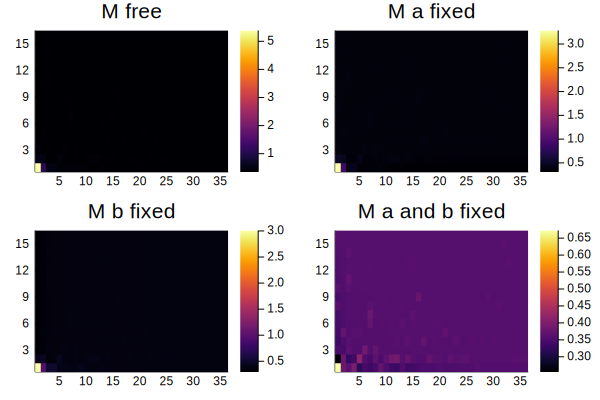

In [16]:
p_free = heatmap(M_free, title="M free")
p_a = heatmap(M_a, title="M a fixed")
p_b = heatmap(M_b, title="M b fixed")
p_ab = heatmap(M_ab, title="M a and b fixed")

plot(p_free, p_a, p_b, p_ab, layout=(2, 2))

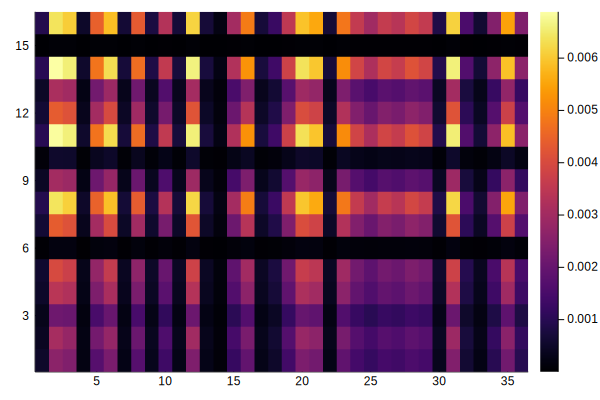

In [21]:
Q = optimaltransport(M_ab, rand(n) |> OTSIN.normalize, rand(m) |> OTSIN.normalize)
heatmap(Q)

In [22]:
using Zygote

In [23]:
function OTSIN.utility(M, a, b)
    P = optimaltransport(M, a, b)
    return utility(P, M)
end

function OTSIN.entropy(M, a, b)
    P = optimaltransport(M, a, b)
    return entropy(P)
end

project_unit(Δx) = Δx .- sum(Δx) / length(Δx) * ones(length(Δx))

project_unit (generic function with 1 method)

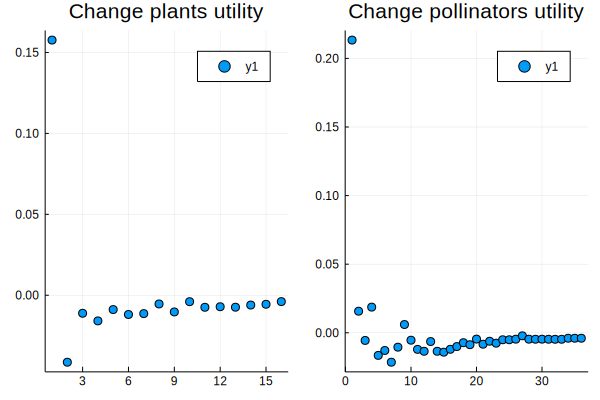

In [24]:
∇M_ab, ∇a, ∇b = gradient(utility, M_ab, a, b)
plot(scatter(project_unit(∇a), title="Change plants utility"),
    scatter(project_unit(∇b), title="Change pollinators utility"))

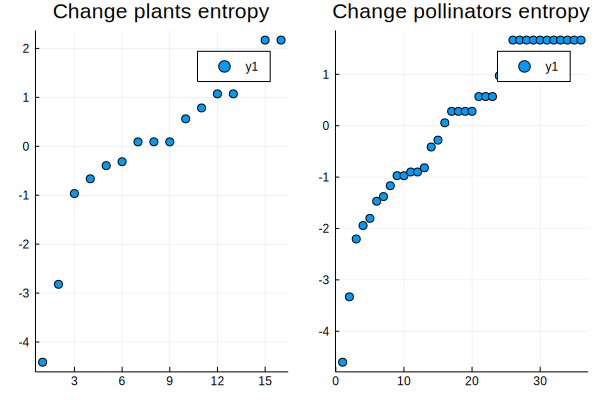

In [25]:
∇M_ab, ∇a, ∇b = gradient(entropy, M_ab, a, b)
plot(scatter(project_unit(∇a), title="Change plants entropy"), scatter(project_unit(∇b), title="Change pollinators entropy"))

In [26]:
optimaltransport(M_ab,
        [max(0.0, rand()) for i in 1:16] |> OTSIN.normalize,
        [max(0.0, rand()) for i in 1:36] |> OTSIN.normalize)

16×36 Array{Float64,2}:
 0.000664174  0.000213141  0.0012936    …  0.000716501  0.00117439 
 0.000161078  7.82713e-5   0.00046015      0.000265293  0.000434832
 0.00201993   0.000866189  0.00546805      0.00302928   0.00496519 
 0.00057339   0.000250461  0.00155956      0.000869595  0.00142532 
 0.00111503   0.000494321  0.00300276      0.00167927   0.00275244 
 0.00221927   0.000960451  0.00596765   …  0.0033367    0.00546907 
 0.00191831   0.00083248   0.00516399      0.00288497   0.00472866 
 0.00229646   0.000981843  0.00609037      0.00340248   0.00557688 
 0.00120759   0.000522134  0.00323886      0.00180945   0.00296581 
 0.000677205  0.000289571  0.00180786      0.00100161   0.0016417  
 0.00087767   0.000379117  0.00238465   …  0.00131054   0.00214806 
 0.000974585  0.000420482  0.00261285      0.00145262   0.00238094 
 0.00222644   0.000960591  0.00594617      0.00331851   0.00543926 
 0.000368895  0.000158968  0.000991248     0.000548835  0.000899576
 0.00179258   0.00077154